In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive
from tqdm import tqdm
import dlib
#!pip install mediapipe
#import mediapipe as mp
import seaborn as sns
from scipy.fftpack import fft2, fftshift
from scipy import ndimage
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm


drive.mount('/content/drive')

Mounted at /content/drive


# Read the data

In [2]:
path = "drive/MyDrive/datasci281/"
train_dir = path + "test/"
test_dir = path + "train/"

df = pd.DataFrame(columns=['path', 'expression'])

for expression in os.listdir(train_dir):
    dir_ = train_dir + expression
    for img_name in os.listdir(dir_):
        img_path = dir_ + '/' + img_name
        df = pd.concat([df, pd.DataFrame({'path': [img_path], 'expression': [expression]})], ignore_index=True)
df.head()

,path,expression
0,drive/MyDrive/datasci281/test/angry/PublicTest...,angry
1,drive/MyDrive/datasci281/test/angry/PublicTest...,angry
2,drive/MyDrive/datasci281/test/angry/PrivateTes...,angry
3,drive/MyDrive/datasci281/test/angry/PrivateTes...,angry
4,drive/MyDrive/datasci281/test/angry/PublicTest...,angry


In [25]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 shape_predictor_68_face_landmarks.dat.bz2

--2025-10-22 04:30:56--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-10-22 04:30:57--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M  12.7MB/s    in 5.3s    

2025-10-22 04:31:03 (11.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]

bunzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


array([[[143, 143, 143],
        [126, 126, 126],
        [115, 115, 115],
        ...,
        [229, 229, 229],
        [229, 229, 229],
        [227, 227, 227]],

       [[122, 122, 122],
        [ 94,  94,  94],
        [107, 107, 107],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[100, 100, 100],
        [ 76,  76,  76],
        [ 91,  91,  91],
        ...,
        [224, 224, 224],
        [225, 225, 225],
        [225, 225, 225]],

       ...,

       [[ 86,  86,  86],
        [ 76,  76,  76],
        [ 83,  83,  83],
        ...,
        [220, 220, 220],
        [218, 218, 218],
        [231, 231, 231]],

       [[ 75,  75,  75],
        [ 74,  74,  74],
        [ 93,  93,  93],
        ...,
        [ 51,  51,  51],
        [ 58,  58,  58],
        [122, 122, 122]],

       [[ 88,  88,  88],
        [ 84,  84,  84],
        [ 97,  97,  97],
        ...,
        [  8,   8,   8],
        [  9,   9,   9],
        [ 10,  10,  10]]], dtype=uint8)
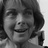

In [34]:
img_curr = cv2.imread(df.path[1000])
original_img = img_curr.copy()
img_curr

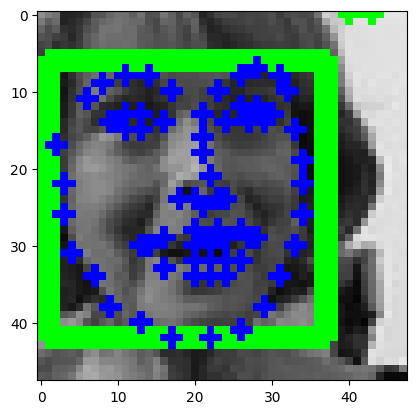

In [35]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# load the input image, resize it, and convert it to grayscale
# image = cv2.imread(args["image"])
# image = imutils.resize(image, width=500)
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# detect faces in the grayscale image
rects = detector(img_curr, 1)
# loop over the face detections
for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(img_curr, rect)
        shape = face_utils.shape_to_np(shape)
        # convert dlib's rectangle to a OpenCV-style bounding box
        # [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img_curr, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # show the face number
        cv2.putText(img_curr, "Face #{}".format(i + 1), (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw them on the image
        for (x, y) in shape:
                cv2.circle(img_curr, (x, y), 1, (0, 0, 255), -1)
# show the output image with the face detections + facial landmarks
plt.imshow(img_curr)
plt.show()



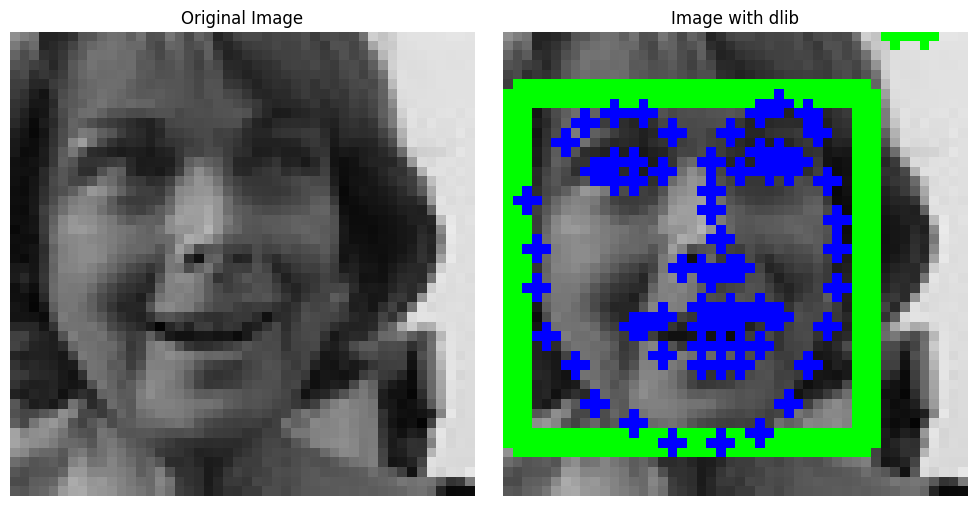

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(original_img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(img_curr)
axes[1].set_title("Image with dlib")
axes[1].axis('off')

plt.tight_layout()
plt.show()